In [1]:
import netCDF4
import xarray as xr
import pyart
import wradlib as wrl
import cartopy.crs as ccrs
import numpy as np
import matplotlib.pyplot as plt

from read_sipam_cappis import read_sipam_cappi

filename = "../data/radar/sipam_manaus/arm_cappi/20140103/sbmn_cappi_20140103_160011.nc"


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [ ]:
wset = wrl.io.read_generic_netcdf(filename)
plt.imshow(wset['variables']['DBZc']['data'][0, 20, :, :])

In [ ]:
xset = xr.open_dataset(filename)
xset.variables['z0']

In [ ]:
dset = netCDF4.Dataset(filename)
dset

In [ ]:
dset.variables['time_bounds']

In [40]:
cappi = read_sipam_cappi(filename)

/home/cclopes/miniconda3/envs/amazon-storms-aerosols/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
str(cappi.z['data']/1000)

/home/cclopes/miniconda3/envs/amazon-storms-aerosols/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


&#39;[0.5 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5 5.0 5.5 6.0 6.5 7.0 7.5 8.0 8.5 9.0\n 9.5 10.0 10.5 11.0 11.5 12.0 12.5 13.0 13.5 14.0 14.5 15.0 15.5 16.0 16.5\n 17.0 17.5 18.0 18.5 19.0 19.5 20.0]&#39;

In [ ]:
pyart.util.datetime_from_grid(cappi).strftime('%Y%m%d%H%M%S')

In [ ]:
np.array(np.ma.MaskedArray.tolist(cappi.fields['DBZc']['data']))
# np.nanmax(x[x != None])

In [ ]:
display = pyart.graph.GridMapDisplay(cappi)
projection = ccrs.PlateCarree()
display.plot_grid('DBZc', level=0, projection=projection)

In [ ]:
display.grid.to_xarray()

In [ ]:
def ppi_to_grid(filename):

    # Read data and convert to grid
    radar = pyart.aux_io.read_gamic(filename)
    grid = pyart.map.grid_from_radars(
        radar, grid_shape=(20, 501, 501),
        grid_limits=((1e3, 20e3), (-250e3, 250e3), (-250e3, 250e3))
    )

    return grid

grid = ppi_to_grid("../data/radar/sipam_manaus/arm/201401/RADL08061720140103031200.HDF5")

In [6]:
raw = pyart.aux_io.read_gamic(
    "../data/radar/sipam_manaus/arm/201401/RADL08061720140103031200.HDF5")

"%.2f" % raw.fixed_angle['data'][0]

/home/cclopes/miniconda3/envs/amazon-storms-aerosols/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


&#39;0.90&#39;

/home/cclopes/miniconda3/envs/amazon-storms-aerosols/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, &#39;fafsdfsd&#39;)

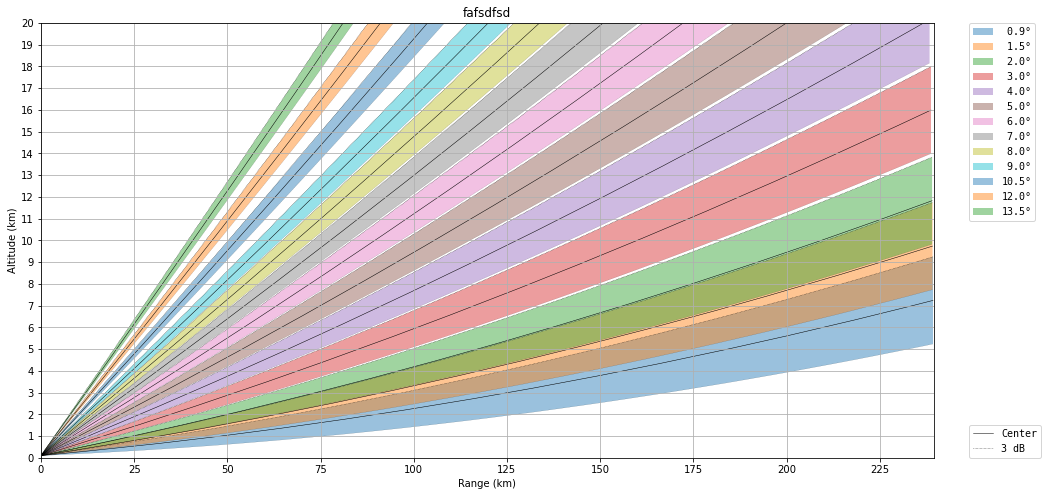

In [46]:
ranges = raw.range['data']
elevs = raw.fixed_angle['data']
site = (float(raw.longitude['data']),
        float(raw.latitude['data']),
        float(raw.altitude['data']))
beamwidth = float(raw.instrument_parameters['radar_beam_width_h']['data'])


ax = wrl.vis.plot_scan_strategy(ranges, elevs, site, beamwidth, vert_res=1000, maxalt=20000, units='km')
ax.set_title('SIPAM S-Band')